In [1]:
# Global Video Game Insights: Platform-Genre Combinations and Consumer Behavior Analysis1

Global Video Game Insights: Platform-Genre Combinations and Consumer Behavior Analysis1

Welcome to our global video game analysis! We are excited to explore the vast world of video games and dive into the relationships between user satisfaction and video game expenditure. Our goal is to understand consumer behavior by analyzing a comprehensive dataset of 16,598 video games, covering various platforms, genres, and publishers. Our research delves into the most popular platform-genre combinations in the top 100 games, aiming to inform future game development decisions. Let's explore the world of video games together and uncover insights that could revolutionize the gaming industry.

https://www.kaggle.com/code/amalsalilan/global-gaming-insights-kaggle-analysis?scriptVersionId=119276604&cellId=3

In [2]:
# import pandas as pd
# import numpy as np
# import plotly.graph_objs as go
# from matplotlib.offsetbox import AnchoredText
# import plotly.express as px

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from skimpy import skim
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("vgsales.csv")
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8629,8631,Tak and the Guardians of Gross,Wii,2008.0,Action,THQ,0.15,0.00,0.00,0.01,0.16
9620,9622,Cloudy With a Chance of Meatballs,Wii,2009.0,Platform,Ubisoft,0.11,0.00,0.00,0.01,0.13
538,539,inFAMOUS: Second Son,PS4,2014.0,Action,Sony Computer Entertainment,1.27,0.97,0.07,0.47,2.78
7223,7225,ECW Hardcore Revolution,N64,2000.0,Fighting,Acclaim Entertainment,0.18,0.04,0.00,0.00,0.22
5014,5016,ESPN Extreme Games,PS,1994.0,Sports,Sony Computer Entertainment,0.11,0.08,0.17,0.03,0.38


In [5]:
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 16598  │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %    ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75      ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Rank               │     0 │       0 │     8300 │   4800 │      1 │   4200 │    12000 │   17000 │  ██████  │  │
│ │ Year               │   270 │     1.6 │     2000 │    5.8 │   2000 │   2000 │     2000 │    2000 │    ▂▅█▂  │  │
│ │ NA_Sales           │     0 │       0 │     0.26 │   0.82 │      0 │      0 │     0.24 │      41 │    █     │  │
│ │ EU_Sales           │     0 │       0 │     0.15 │   0.51 │      0 │      0 │     0.11 │      29 │    █     │  │
│ │ JP_Sales           │     0 │       0 │    0.078 │   0.31 │      0 │      0 │     0.04 │      10 │    █     │  │
│ │ Other_Sales        │     0 │       0 │    0.048 │   0.19 │      0 │      0 │     0.04 │      11 │    █     │  │
│ │ Global_Sales       │     0 │       0 │     0.54 │    1.6 │   0.01 │   0.06 │     0.47 │      83 │    █     │  │
│ └────────────────────┴───────┴─────────┴──────────┴────────┴────────┴────────┴──────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                      │       0 │          0 │                            4 │                    66000 │  │
│ │ Platform                  │       0 │          0 │                            4 │                    66000 │  │
│ │ Genre                     │       0 │          0 │                            4 │                    66000 │  │
│ │ Publisher                 │      58 │       0.35 │                            4 │                    66000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Popularity of gaming platforms: By analyzing the number of sales for each platform, you can see which platforms are the most popular and in demand.

In [6]:
platform_sales = df.groupby(['Platform'])['Global_Sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=True)

In [7]:
platform_sales

,Platform,Global_Sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.87
3,DC,15.97
8,GEN,28.36
21,SAT,33.59


In [8]:
# fig, ax = plt.subplots(figsize=(15, 8))
# ax.bar(platform_sales['Platform'], platform_sales['Global_Sales'])
# ax.set_xlabel('Platform')
# ax.set_ylabel('Global Sales (in millions)')
# ax.set_title('Popularity of Gaming Platforms')
# plt.xticks(rotation=45)
# plt.show()

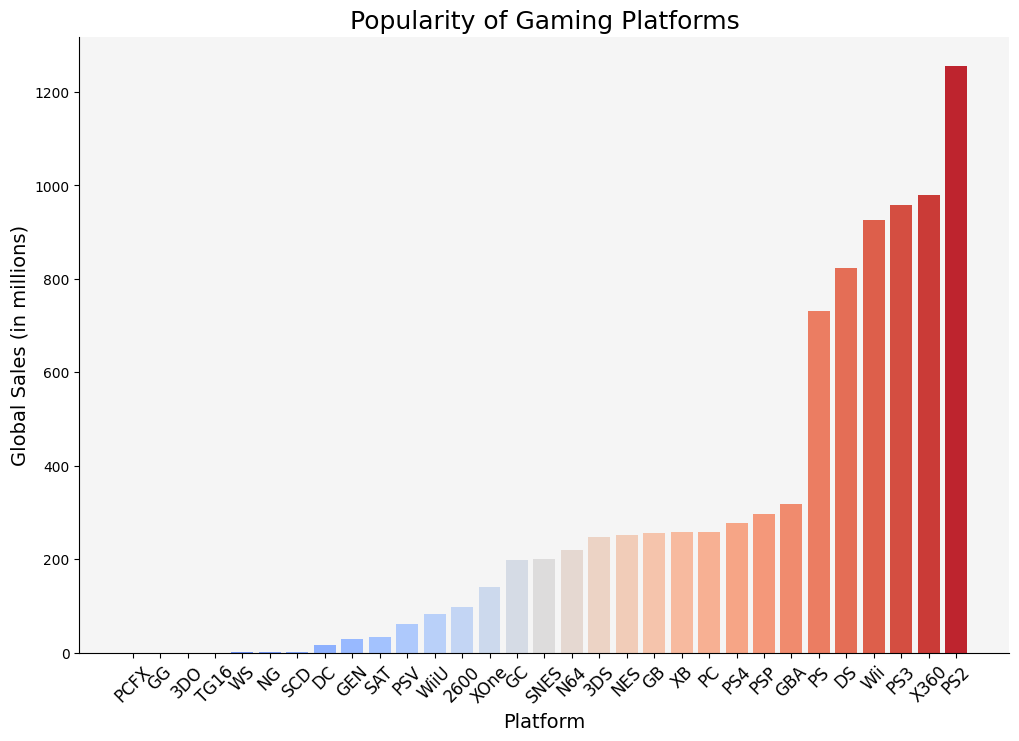

In [9]:

# Group the data by platform and calculate the total global sales
platform_sales = df.groupby(['Platform'])['Global_Sales'].sum().reset_index()

# Sort the platforms by global sales in ascending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=True)

# Set the color palette
palette = sns.color_palette("coolwarm", len(platform_sales))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar chart with the custom color palette
ax.bar(platform_sales['Platform'], platform_sales['Global_Sales'], color=palette)

# Set the labels and title
ax.set_xlabel('Platform', fontsize=14)
ax.set_ylabel('Global Sales (in millions)', fontsize=14)
ax.set_title('Popularity of Gaming Platforms', fontsize=18)

# Customize the font style
plt.rcParams['font.family'] = 'monospace'

# Set the x-axis labels to 45 degrees for better readability
plt.xticks(rotation=45, fontsize=12)

# Remove the top and right spines
sns.despine()

# Add a background image
ax.set_facecolor('#F5F5F5')

# Show the plot
plt.show()



It seems that the most popular and in-demand gaming platforms are the PlayStation 2 (PS2) and Xbox 360 (X360), with global sales of approximately 1255.64 million and 979.96 million dollars, respectively. The Wii and Nintendo DS (DS) are also popular platforms, with global sales of 926.71 million and 822.49 million dollars, respectively. The top ten platforms in terms of global sales also include the PlayStation 3 (PS3), PlayStation (PS), and Game Boy Advance (GBA).

On the other end of the spectrum, some platforms such as the TurboGrafx-16 (TG16) and 3DO had much lower global sales, with only 0.16 million and 0.10 million dollars, respectively.

It is worth noting that these figures are sum total global sales, which means that the popularity of a platform may vary by region. Additionally, these figures may not take into account more recent platforms such as the PlayStation 5 (PS5) and Xbox Series X/S


## Sales by region

In [10]:

# platform_sales = df.groupby(["Platform"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
# platform_sales = platform_sales.reset_index()
# fig = px.bar(platform_sales, x="Platform", y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
#              color="NA_Sales",
#              labels={"NA_Sales": "North America", "EU_Sales": "Europe", "JP_Sales": "Japan", "Other_Sales": "Other"},
#              title="Sales by Region",
#              template="plotly_dark")
# fig.update_layout(xaxis=dict(title='Platform'), yaxis=dict(title='Sales (in millions)'))
# fig.show()

In [11]:

# Group the data by platform and calculate the total sales by region
platform_sales = df.groupby(["Platform"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
platform_sales = platform_sales.reset_index()

# Create the bar chart
fig = px.bar(platform_sales, x="Platform", y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
             color_discrete_sequence=px.colors.qualitative.Pastel,
             labels={"NA_Sales": "North America", "EU_Sales": "Europe", "JP_Sales": "Japan", "Other_Sales": "Other"},
             title="Sales by Region",
             template="plotly_dark")

# Set the font style
fig.update_layout(font_family='monospace')

# Add annotations to the bars
for trace in fig.data:
    for i in range(len(trace.y)):
        fig.add_annotation(x=trace.x[i], y=trace.y[i], text=round(trace.y[i], 2),
                           showarrow=False, font=dict(size=10, color='white'))

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Platform', showgrid=False, tickfont=dict(size=14)),
    yaxis=dict(title='Sales (in millions)', showgrid=False, tickfont=dict(size=14)),
    legend=dict(title='Region', font=dict(size=12)),
    title=dict(font=dict(size=20), x=0.5, y=0.95),
    plot_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, b=50, t=80, pad=4))

# Show the plot
fig.show()


## Genre sales

In [12]:

# # Group the data by genre and calculate the total sales by region
# genre_sales = df.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
# genre_sales["Global_Sales"] = genre_sales.sum(axis=1)

# # Create the bar chart
# sns.set(style="whitegrid")
# sns.set_color_codes("pastel")
# f, ax = plt.subplots(figsize=(12, 8))
# sns.barplot(x=genre_sales.index, y=genre_sales["Global_Sales"], data=genre_sales,
#             label="Global Sales", color="b", edgecolor="w")

# # Customize the plot
# ax.set_ylim(bottom=0)
# ax.legend(ncol=2, loc="upper left", frameon=True, fontsize=12)
# ax.set(xlabel="Genre", ylabel="Global Sales (in millions)",
#        title="Sales by Genre")
# sns.despine(left=True, bottom=True)

# # Add value labels to the bars
# for i, v in enumerate(genre_sales["Global_Sales"].round(2)):
#     ax.text(i, v + 1, str(v), color='black', ha='center', fontweight='bold')

# # Add background color to the plot
# ax.set_facecolor('#F9F9F9')

# # Show the plot
# plt.show()

In [13]:
# # Group the data by genre and calculate the total sales by region
# genre_sales = df.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
# genre_sales["Global_Sales"] = genre_sales.sum(axis=1)

# # Set the style and color palette
# sns.set(style="darkgrid")
# sns.set_palette("Set2")

# # Create the figure and axes objects
# fig, ax = plt.subplots(figsize=(12, 8))

# # Create the bar chart
# sns.barplot(x=genre_sales.index, y=genre_sales["Global_Sales"], data=genre_sales,
#             label="Global Sales", edgecolor="w")

# # Add value labels to the bars
# for i, v in enumerate(genre_sales["Global_Sales"].round(2)):
#     ax.text(i, v + 1, f"${v}M", color='black', ha='center', fontweight='bold', fontsize=14)

# # Add a title and axis labels
# ax.set_title("Total Sales by Video Game Genre", fontsize=24, fontweight="bold")
# ax.set_xlabel("Genre", fontsize=16, fontweight="bold")
# ax.set_ylabel("Global Sales (in millions)", fontsize=16, fontweight="bold")

# # Rotate the x-axis labels for better readability
# ax.tick_params(axis='x', labelrotation=45)

# # Add a legend and remove the borders
# ax.legend(ncol=2, loc="upper left", frameon=False, fontsize=14)
# sns.despine(left=True, bottom=True)

# # Add background color to the plot
# fig.patch.set_facecolor("#F9F9F9")
# ax.set_facecolor("#F9F9F9")


# # Save and show the plot
# plt.savefig("video_game_genre_sales.png", dpi=300, bbox_inches="tight")
# plt.show()


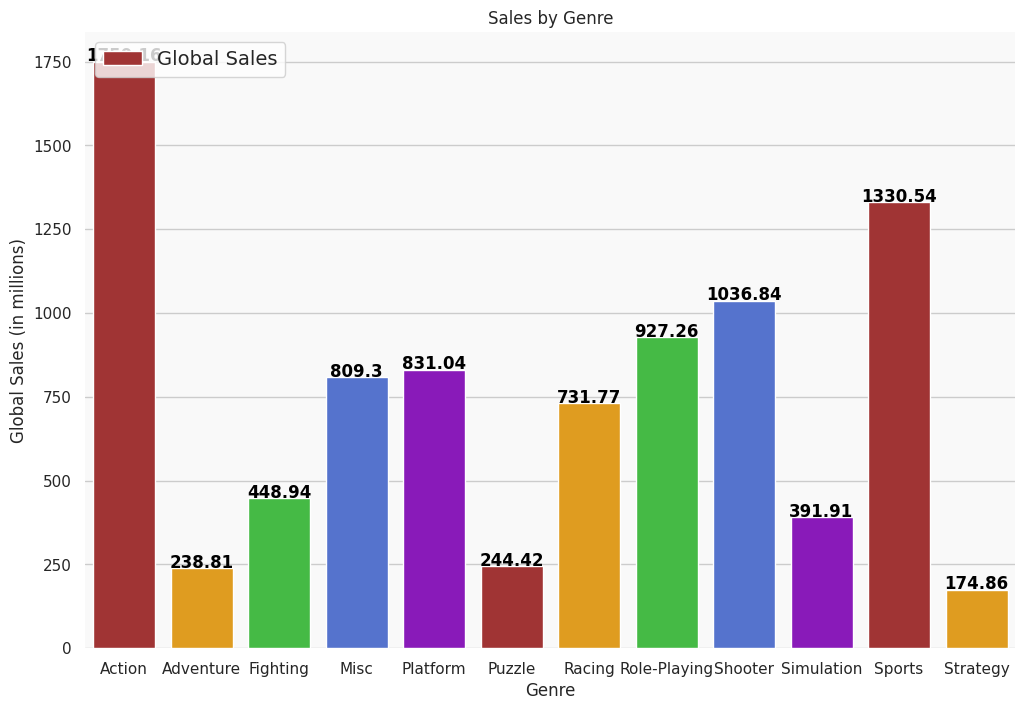

In [14]:

# Group the data by genre and calculate the total sales by region
genre_sales = df.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
genre_sales["Global_Sales"] = genre_sales.sum(axis=1)

# Define custom colors for the plot
colors = ["#B22222", "#FFA500", "#32CD32", "#4169E1", "#9400D3"]

# Create the bar chart
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=genre_sales.index, y=genre_sales["Global_Sales"], data=genre_sales,
            label="Global Sales", palette=colors, edgecolor="w")

# Customize the plot
ax.set_ylim(bottom=0)
ax.legend(ncol=2, loc="upper left", frameon=True, fontsize=14)
ax.set(xlabel="Genre", ylabel="Global Sales (in millions)",
       title="Sales by Genre")
sns.despine(left=True, bottom=True)

# Add value labels to the bars
for i, v in enumerate(genre_sales["Global_Sales"].round(2)):
    ax.text(i, v + 1, str(v), color='black', ha='center', fontweight='bold', fontsize=12)

# Add a horizontal line to indicate the overall average sales
# overall_avg_sales = genre_sales["Global_Sales"].mean()
# ax.axhline(y=overall_avg_sales, color='black', linestyle='--')
# ax.text(8, overall_avg_sales + 3, f"Overall Average = {overall_avg_sales:.2f}M", color='black', ha='right', fontsize=12)

# Add background color to the plot
ax.set_facecolor('#F9F9F9')

# Show the plot
plt.show()


### publisher and sum the sales for each region

In [15]:
# publisher_sales = df.groupby(["Publisher"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
# publisher_sales["Total Sales"] = publisher_sales.sum(axis=1)
# fig = px.bar(publisher_sales.reset_index(), x='Publisher', y='Total Sales', color='Total Sales', 
#              height=500, color_continuous_scale='sunset')
# fig.update_layout(title='Sales by Publisher', xaxis_title='Publisher', yaxis_title='Total Sales (in millions)')
# fig.show()

In [16]:
# Group the data by publisher and calculate the total sales by region
publisher_sales = df.groupby(["Publisher"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
publisher_sales["Total Sales"] = publisher_sales.sum(axis=1)

# Create the bar chart using Plotly
fig = px.bar(publisher_sales.reset_index(), x='Publisher', y='Total Sales', color='Total Sales', 
             height=600, color_continuous_scale='Sunsetdark')

# Add custom text labels to the bars
fig.update_traces(texttemplate='%{y:.2s}M', textposition='outside')

# Add a title and axis labels
fig.update_layout(title={'text': "Total Sales by Video Game Publisher", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title="Publisher", yaxis_title="Total Sales (in millions)")

# Customize the colorbar and legend
fig.update_layout(coloraxis_colorbar=dict(title="Total Sales (in millions)", thickness=20, len=0.5),
                  legend=dict(title="Total Sales (in millions)", yanchor="top", y=0.95, xanchor="left", x=0.01))

# Add background color and font styles
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font_family="Open Sans",
    font_color="white"
)

# Show the chart
fig.show()


In [17]:

# # group the data by publisher and sum the sales columns
# publisher_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# publisher_sales['Total Sales'] = publisher_sales.sum(axis=1)

# # create a horizontal bar chart with total sales on the y-axis
# fig = px.bar(publisher_sales.reset_index(), x='Total Sales', y='Publisher', color='Total Sales',
#              height=600, orientation='h', color_continuous_scale='sunset')

# # customize the chart title, axis labels, and color scale
# fig.update_layout(title='Total Sales by Publisher',
#                   xaxis_title='Total Sales (in millions)',
#                   yaxis_title='Publisher',
#                   coloraxis_colorbar_title='Total Sales (in millions)',
#                   coloraxis_colorbar_len=0.75,
#                   coloraxis_colorbar_thickness=20,
#                   coloraxis_cmin=0,
#                   coloraxis_cmax=publisher_sales['Total Sales'].max())

# # show the chart
# fig.show()



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


year and sum the sales for each year

In [19]:
# grouped = df.groupby('Year').sum()
# plt.plot(grouped.index, grouped['Global_Sales'])
# plt.xlabel('Year')
# plt.ylabel('Global Sales (in millions)')
# plt.title('Trends Over Time in the Video Game Industry')
# plt.show()

/tmp/ipykernel_14007/1645393331.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



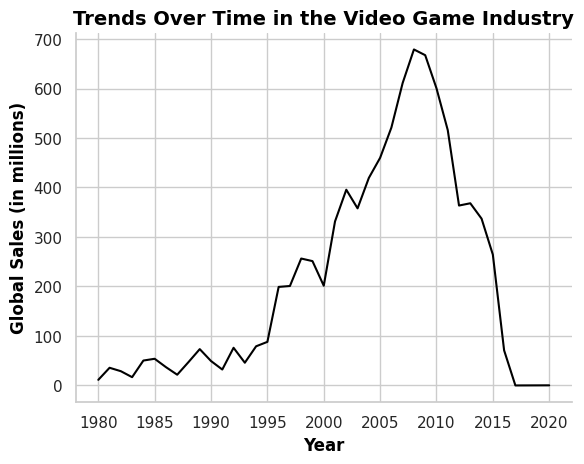

In [20]:


plt.figure(facecolor='None')

grouped = df.groupby('Year').sum()
plt.plot(grouped.index, grouped['Global_Sales'], color='black')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Global Sales (in millions)', fontsize=12, fontweight='bold', color='black')
plt.title('Trends Over Time in the Video Game Industry', fontsize=14, fontweight='bold', color='black')
sns.despine()

plt.show()

In [21]:

# # Group the data by year and calculate the total sales
# grouped = df.groupby('Year').sum()

# # Create the plot using Seaborn
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.lineplot(data=grouped, x=grouped.index, y='Global_Sales', color='black', linewidth=3)

# # Add labels and customize the plot
# ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='black')
# ax.set_ylabel('Global Sales (in millions)', fontsize=14, fontweight='bold', color='black')
# ax.set_title('Trends Over Time in the Video Game Industry', fontsize=18, fontweight='bold', color='black')

# # Set the ticks and tick labels
# ax.tick_params(axis='both', which='major', labelsize=12, color='black', width=1)
# ax.set_xticks(grouped.index[::4])
# ax.set_xticklabels(grouped.index[::4], rotation=45, ha='right', color='black')

# # Remove spines and add a grid
# sns.despine()
# ax.grid(axis='y', linestyle='--', color='gray')

# # Set a transparent background
# fig.patch.set_facecolor('none')

# # Show the plot
# plt.show()

# # In this modified code, we're setting the facecolor of the figure object to 'none' which makes the background of the plot transparent.


In [22]:

# # group the data by year and sum the global sales column
# grouped = df.groupby('Year')['Global_Sales'].sum().reset_index()

# # create a line plot to show trends in global sales over time
# fig, ax = plt.subplots(figsize=(10,6))
# sns.lineplot(x='Year', y='Global_Sales', data=grouped, ax=ax, color='#1f77b4', linewidth=2.5)

# # customize the plot title, axis labels, and tick marks
# ax.set_title('Trends in Global Video Game Sales', fontsize=24, fontweight='bold', color='#333333', fontname='Arial')
# ax.set_xlabel('Year', fontsize=18, fontweight='bold', color='#333333', fontname='Arial')
# ax.set_ylabel('Global Sales (in millions)', fontsize=18, fontweight='bold', color='#333333', fontname='Arial')
# ax.tick_params(axis='both', labelsize=14, length=6, width=2, color='#666666')

# # add a grid and remove the top and right spines for better aesthetics
# ax.grid(linestyle='--', alpha=0.7, color='#d9d9d9')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_linestyle('--')
# ax.spines['bottom'].set_linestyle('--')

# # set the background color to a light gray with a subtle diagonal line texture
# fig.patch.set_facecolor('#f2f2f2')
# ax.set_facecolor('#f2f2f2')
# ax.set_axisbelow(True)
# ax.grid(zorder=0)
# diagonal_pattern = [5, 2, 1, 2, 5, 5, 2, 1]
# ax.set_facecolor((0.95, 0.95, 0.95, 1))
# ax.patch.set_hatch(''.join([f'{i}' for i in diagonal_pattern]))

# # show the plot
# plt.show()

## Create a crosstab to see the frequency of each platform-genre combination

In [23]:
platform_genre_ct = pd.crosstab(df['Platform'], df['Genre'])
print(platform_genre_ct)

Genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Platform                                                                
2600          61          2         2     5         9      11       6   
3DO            0          1         0     0         0       1       0   
3DS          182         37        14    53        28      20      11   
DC             3         11        12     0         2       0       6   
DS           343        240        36   393        92     238      67   
GB             6          5         0     8        19      15       2   
GBA          167         38        23   110       142      41      64   
GC           101         20        42    36        73      13      63   
GEN            3          2         5     1         7       0       1   
GG             0          0         0     0         1       0       0   
N64           38          4        29    18        30      12      57   
NES           13          1         4     2        

In [24]:
# df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
# df = df.sort_values('Total_Sales', ascending=False)
# top_100 = df.head(100)
# plt.figure(figsize=(15, 6))
# plt.bar(top_100['Name'], top_100['Total_Sales'])
# plt.xlabel("Game Name")
# plt.ylabel("Total Sales (in Millions)")
# plt.title("Market Share of the Top 100 Games")
# plt.xticks(rotation=90)
# plt.show()

In [25]:

# # Calculate the total sales and sort the dataframe
# df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
# df = df.sort_values('Total_Sales', ascending=False)
# top_100 = df.head(100)

# # Set the figure size and style
# plt.figure(figsize=(12, 8))
# sns.set(style='whitegrid', font_scale=1.2, palette='pastel')

# # Create the bar chart
# sns.barplot(x=top_100['Name'], y=top_100['Total_Sales'], color='#83c5be')

# # Customize the plot
# plt.xlabel("Game Name", fontweight='bold')
# plt.ylabel("Total Sales (in Millions)", fontweight='bold')
# plt.title("Market Share of the Top 100 Games", fontweight='bold')
# plt.xticks(rotation=90)

# # Add value labels to the bars
# for i, v in enumerate(top_100['Total_Sales']):
#     plt.text(i, v+1, f'{v:,.2f}', ha='center', color='black', fontweight='bold')

# # Add a background color to the plot
# sns.set_style('whitegrid', {'axes.facecolor': 'white', 'axes.edgecolor': '0.8'})

# # Remove the top and right spines
# sns.despine(top=True, right=True)

# plt.show()

In [26]:

# # Calculate the total sales and sort the dataframe
# df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
# df = df.sort_values('Total_Sales', ascending=False)
# top_100 = df.head(100)

# # Set the figure size and style
# plt.figure(figsize=(12, 8))
# sns.set(style='whitegrid', font_scale=0.7, palette='pastel')

# # Create the bar chart
# sns.barplot(x=top_100['Name'], y=top_100['Total_Sales'], color='#83c5be')

# # Customize the plot
# plt.xlabel("Game Name", fontweight='bold')
# plt.ylabel("Total Sales (in Millions)", fontweight='bold')
# plt.title("Market Share of the Top 100 Games", fontweight='bold')
# plt.xticks(rotation=90)

# # Add a background color to the plot
# sns.set_style('whitegrid', {'axes.facecolor': 'white', 'axes.edgecolor': '0.8'})

# # Remove the top and right spines
# sns.despine(top=True, right=True)

# plt.show()

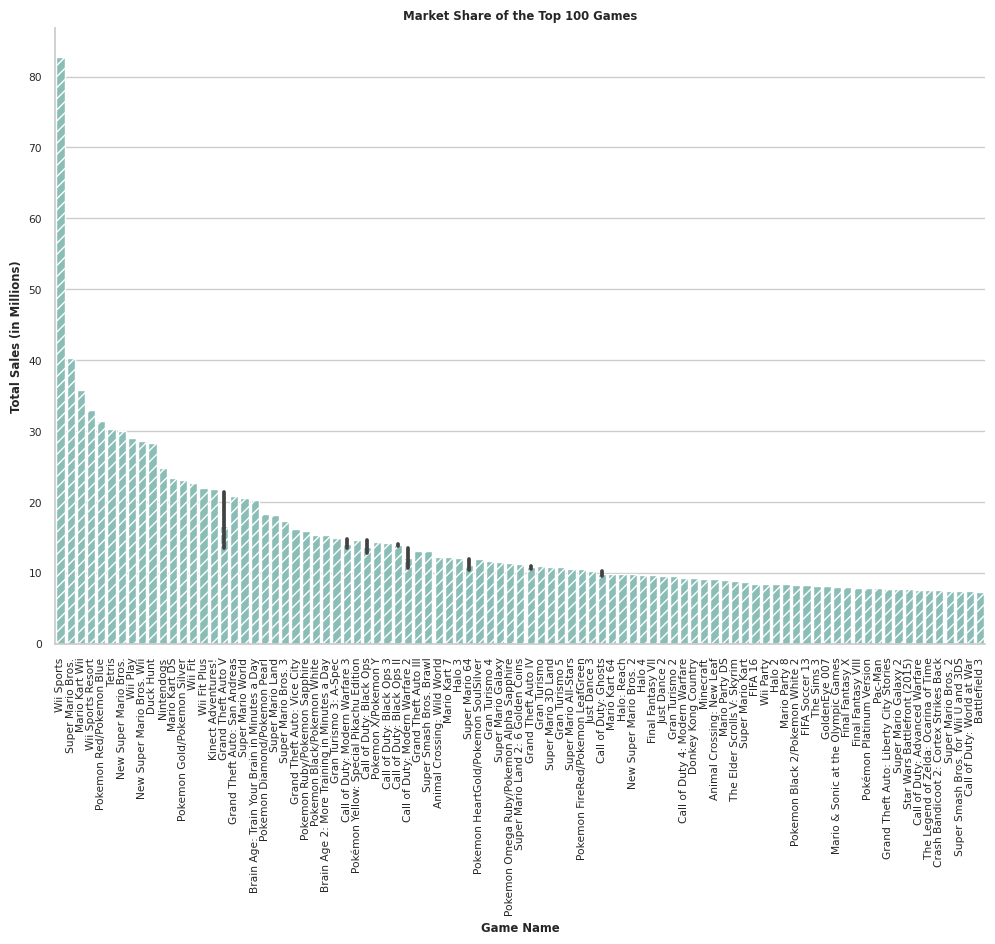

In [27]:

# Calculate the total sales and sort the dataframe
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df = df.sort_values('Total_Sales', ascending=False)
top_100 = df.head(100)

# # Set the figure size and style
# plt.figure(figsize=(12, 8))
# sns.set(style='whitegrid', font_scale=1.2)

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=0.7)

# Create the bar chart with a custom color and texture
sns.barplot(x=top_100['Name'], y=top_100['Total_Sales'], color='#83c5be', hatch='///')

# Customize the plot
plt.xlabel("Game Name", fontweight='bold')
plt.ylabel("Total Sales (in Millions)", fontweight='bold')
plt.title("Market Share of the Top 100 Games", fontweight='bold')
plt.xticks(rotation=90)

# Add a background color to the plot
sns.set_style('whitegrid', {'axes.facecolor': 'white', 'axes.edgecolor': '0.8'})

# Remove the top and right spines
sns.despine(top=True, right=True)

plt.show()

In [28]:
# platform_sales = df.groupby(["Platform"])["Global_Sales"].sum()
# fig = px.bar(platform_sales.reset_index(), x='Platform', y='Global_Sales', color='Global_Sales', height=500)
# fig.update_layout(title='Popularity of Gaming Platforms',
#                   xaxis_title='Platform',
#                   yaxis_title='Global Sales (in millions)')
# fig.show()


In [29]:
platform_sales = df.groupby("Platform")["Global_Sales"].sum().reset_index()
fig = px.bar(platform_sales, x="Platform", y="Global_Sales",
             color="Global_Sales", height=500,
             color_continuous_scale="blues")
fig.update_layout(
    title={
        "text": "Popularity of Gaming Platforms",
        "y": 0.95,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top"
    },
    xaxis_title="Platform",
    yaxis_title="Global Sales (in millions)",
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)"
)
fig.update_traces(marker=dict(line=dict(width=1, color="black"), 
                              opacity=0.9,
                              color="mediumblue",
                              ),
                  selector=dict(type="bar"))
fig.update_xaxes(showline=True, linewidth=1, linecolor="black", showgrid=False, 
                 tickfont=dict(size=11, color="black"))
fig.update_yaxes(showline=True, linewidth=1, linecolor="black", 
                 gridcolor="lightgray", tickfont=dict(size=11, color="black"))
fig.show()



# Successful Game Genres

In [30]:
data=df.copy()
grouped_data = data.groupby("Genre")["Global_Sales"].sum().reset_index()
fig = px.bar(grouped_data, x="Genre", y="Global_Sales", color="Global_Sales", height=600)
fig.update_layout(title="Successful Game Genres", xaxis_title="Genre", yaxis_title="Total Sales (in millions)")
fig.update_traces(texttemplate='%{y:.2f}M', textposition='outside')
fig.show()

In [31]:


# # Calculate total global sales by genre
# genre_sales = df.groupby("Genre")["Global_Sales"].sum().reset_index()

# # Create a bar plot with color based on global sales
# fig = px.bar(genre_sales, x="Genre", y="Global_Sales", color="Global_Sales", height=600,
#              color_continuous_scale='Blues')

# # Add title and axis labels
# fig.update_layout(title="Successful Game Genres", xaxis_title="Genre", yaxis_title="Total Sales (in millions)")

# # Add data labels
# fig.update_traces(texttemplate='%{y:.2f}M', textposition='inside', textfont=dict(color='white'))

# # Customize plot appearance
# fig.update_layout(
#     plot_bgcolor="#f8f9fa",
#     paper_bgcolor="#f8f9fa",
#     font=dict(color="#495057", size=14),
#     coloraxis_colorbar=dict(
#         title="Global Sales (in millions)",
#         thicknessmode="pixels", thickness=20,
#         lenmode="pixels", len=400,
#         yanchor="top", y=0.95,
#         tickfont=dict(color="#495057", size=12),
#         titlefont=dict(color="#495057", size=14)
#     )
# )

# fig.show()


In [32]:
# data = df.copy()
# grouped_data = data.groupby("Genre")["Global_Sales"].sum().reset_index()
# fig = px.bar(grouped_data, x="Genre", y="Global_Sales", color="Global_Sales", height=600)
# fig.update_layout(title="Successful Game Genres", xaxis_title="Genre", yaxis_title="Total Sales (in millions)")
# fig.update_traces(texttemplate='%{y:.2f}M', textposition='outside', textfont=dict(color='black'))
# fig.show()



# Relationship between Video Game Expenditure and User Satisfaction

In [33]:
# df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
# fig = px.scatter(df, x='Total_Sales', y='Global_Sales', color='Genre',
#                  hover_data=['Name', 'Platform', 'Year', 'Publisher'],
#                  height=800, width=900)
# fig.update_layout(title="Relationship between Video Game Expenditure and User Satisfaction",
#                   xaxis_title="Total Sales",
#                   yaxis_title="Global Sales")
# fig.show()

In [34]:

# Set the theme to a metallic style
pio.templates.default = "plotly_dark"

# Create the scatter plot with custom styling
fig = px.scatter(df, x='Total_Sales', y='Global_Sales', color='Genre',
                 hover_data=['Name', 'Platform', 'Year', 'Publisher'],
                 height=800, width=900)

fig.update_traces(marker=dict(size=10, line=dict(width=2, color='white'), 
                  symbol='circle', opacity=0.7))

fig.update_layout(title="Relationship between Video Game Expenditure and User Satisfaction",
                  xaxis_title="Total Sales",
                  yaxis_title="Global Sales",
                  font=dict(family='Arial', size=16, color='white'),
                  plot_bgcolor='#222', paper_bgcolor='#222',
                  legend=dict(title='', font=dict(family='Arial', size=12, color='white'),
                              bgcolor='#333', bordercolor='#888', borderwidth=1))

fig.show()

## Global Sales by Platform and Genre (Top 100 Games)

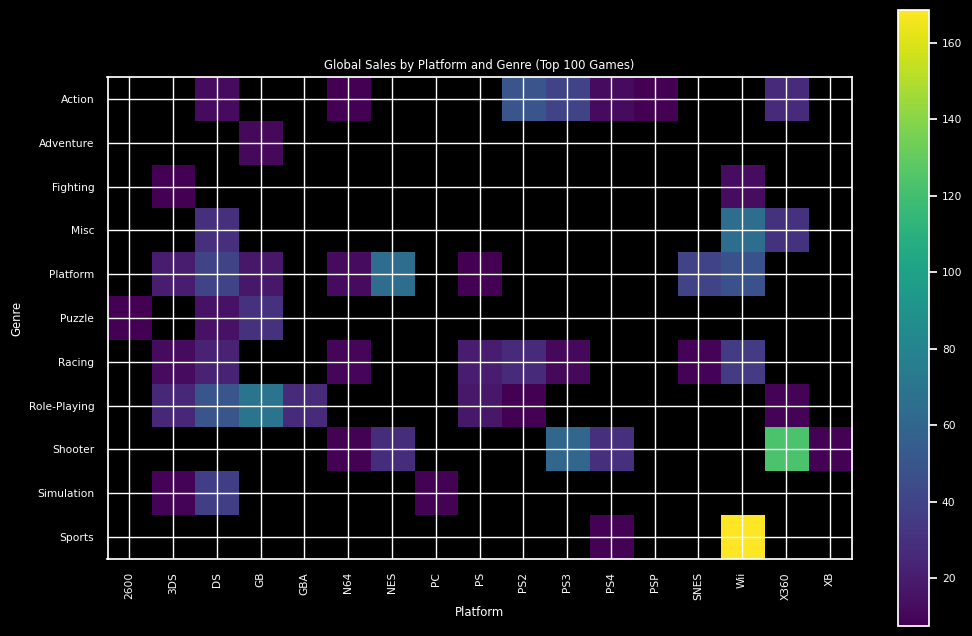

In [37]:


top_100 = df.sort_values('Global_Sales', ascending=False).head(100)
grouped = top_100.groupby(['Platform', 'Genre'])
platform_genre_sales = grouped['Global_Sales'].sum().reset_index()
platform_genre_sales_pivot = platform_genre_sales.pivot(index='Genre', columns='Platform', values='Global_Sales')
plt.figure(figsize=(12,8))
plt.title('Global Sales by Platform and Genre (Top 100 Games)')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.imshow(platform_genre_sales_pivot, cmap='viridis')
plt.xticks(range(len(platform_genre_sales_pivot.columns)), platform_genre_sales_pivot.columns, rotation=90)
plt.yticks(range(len(platform_genre_sales_pivot.index)), platform_genre_sales_pivot.index)
plt.colorbar()
plt.show()



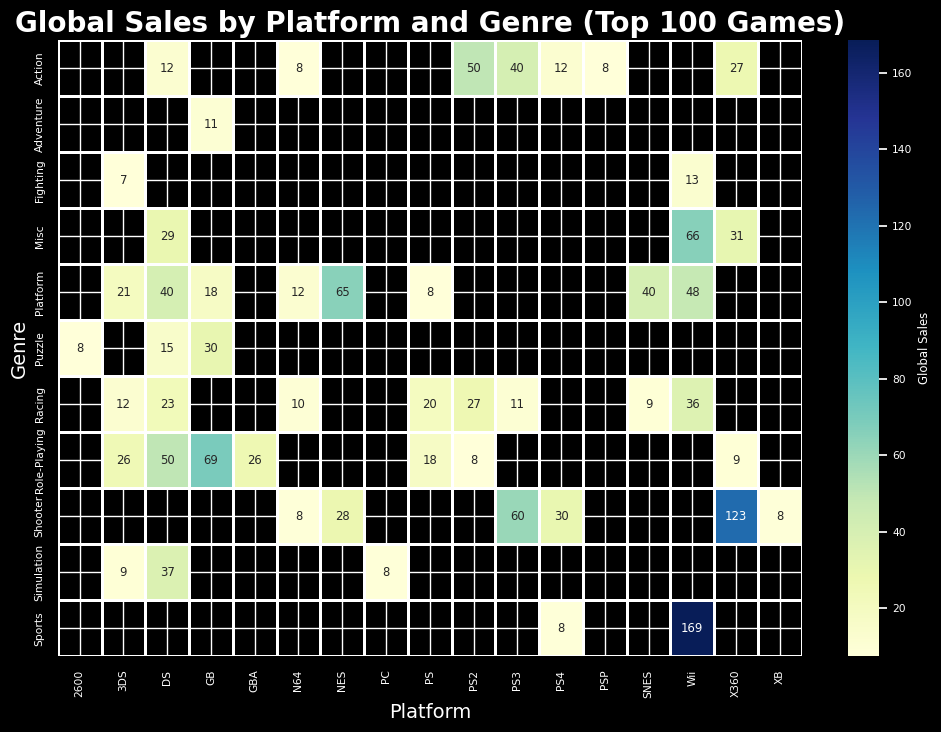

In [38]:

# Set the style to a metallic theme
plt.style.use('dark_background')

# Create the pivot table and heatmap with custom styling
platform_genre_sales_pivot = platform_genre_sales.pivot(index='Genre', columns='Platform', values='Global_Sales')

fig, ax = plt.subplots(figsize=(12, 8))

cbar_kws = {'label': 'Global Sales'}

sns.heatmap(platform_genre_sales_pivot, cmap='YlGnBu', linewidths=1, ax=ax,
            cbar_kws=cbar_kws, annot=True, fmt='.0f')

ax.set_title('Global Sales by Platform and Genre (Top 100 Games)',
             fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'white'})
ax.set_xlabel('Platform', fontdict={'fontsize': 14, 'color': 'white'})
ax.set_ylabel('Genre', fontdict={'fontsize': 14, 'color': 'white'})

plt.xticks(rotation=90)

plt.show()

Top 5 Games in each Genre by Global Sales

In [39]:
# grouped = df.groupby('Genre').apply(lambda x: x.nlargest(5, 'Global_Sales'))
# fig = px.bar(grouped, x='Name', y='Global_Sales', color='Genre', text='Global_Sales',
#              color_discrete_sequence=px.colors.qualitative.Light24)
# fig.update_layout(title='Top 5 Games in each Genre by Global Sales')
# fig.show()

In [40]:
# grouped = df.groupby('Genre').apply(lambda x: x.nlargest(5, 'Global_Sales'))
# fig = px.bar(grouped, x='Name', y='Global_Sales', color='Genre', text='Global_Sales',
#              color_discrete_sequence=px.colors.qualitative.Light24)
# fig.update_layout(title='Top 5 Games in each Genre by Global Sales')
# fig.show()


In [41]:

# Set the theme to a metallic style
pio.templates.default = "plotly_dark"

# Group the data and create the bar chart with custom styling
grouped = df.groupby('Genre').apply(lambda x: x.nlargest(5, 'Global_Sales'))
fig = px.bar(grouped, x='Name', y='Global_Sales', color='Genre', text='Global_Sales',
             color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)
fig.update_layout(title='Top 5 Games in each Genre by Global Sales',
                  xaxis_title='Game Name', yaxis_title='Global Sales',
                  font=dict(family='Arial', size=16, color='white'),
                  plot_bgcolor='#222', paper_bgcolor='#222',
                  legend=dict(title='', font=dict(family='Arial', size=12, color='white'),
                              bgcolor='#333', bordercolor='#888', borderwidth=1))

fig.show()



In [42]:
# Set the theme to a metallic style
pio.templates.default = "plotly_dark"

# Group the data and create the bar chart with custom styling
grouped = df.groupby('Genre').apply(lambda x: x.nlargest(5, 'Global_Sales'))
fig = px.bar(grouped, x='Global_Sales', y='Name', color='Genre', text='Global_Sales',
             color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)
fig.update_layout(title='Top 5 Games in each Genre by Global Sales',
                  xaxis_title='Global Sales', yaxis_title='',
                  font=dict(family='Arial', size=16, color='white'),
                  plot_bgcolor='#222', paper_bgcolor='#222',
                  legend=dict(title='', font=dict(family='Arial', size=12, color='white'),
                              bgcolor='#333', bordercolor='#888', borderwidth=1),
                  margin=dict(l=120, r=20, t=100, b=20),
                  width=900, height=800)

fig.show()


In [43]:

# # Set the theme to a metallic style
# pio.templates.default = "plotly_dark"

# # Group the data and create the bar chart with custom styling
# grouped = df.groupby('Genre').apply(lambda x: x.nlargest(5, 'Global_Sales'))
# fig = px.bar(grouped, x='Name', y='Global_Sales', color='Genre', text='Global_Sales',
#              color_discrete_sequence=px.colors.qualitative.Light24)

# fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8, texttemplate='%{y:.1f}M')
# fig.update_layout(title='Top 5 Games in each Genre by Global Sales',
#                   xaxis_title='Game Name', yaxis_title='Global Sales (in millions)',
#                   font=dict(family='Arial', size=16, color='white'),
#                   plot_bgcolor='#222', paper_bgcolor='#222',
#                   legend=dict(title='', font=dict(family='Arial', size=12, color='white'),
#                               bgcolor='#333', bordercolor='#888', borderwidth=1),
#                   hovermode='x',
#                   hoverlabel=dict(font=dict(family='Arial', size=12, color='white')),
#                 #   hoverlabel='<b>%{x}</b><br>Genre: %{marker.color}<br>Global Sales: %{y:.2f}M<br>%{text}',
#                   barmode='stack')

# # Add a new trace showing the total global sales for each genre
# total_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
# total_sales = total_sales.sort_values('Global_Sales', ascending=False)
# fig.add_trace(px.bar(total_sales, x='Genre', y='Global_Sales', 
#                      marker_color='white', opacity=0.2, showlegend=False).data[0])

# fig.show()

Best Publisher in Each Genre

In [56]:
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()
# pivot = grouped.pivot(index='Genre', columns='Publisher', values='Global_Sales')
# pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
# pivot.plot(kind='bar', stacked=True, figsize=(15, 8))
# plt.title("Best Publisher in Each Genre")
# plt.xlabel("Genre")
# plt.ylabel("Global Sales (in millions)")
# plt.show()

In [57]:
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()
# pivot = grouped.pivot(index='Genre', columns='Publisher', values='Global_Sales')
# pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
# pivot.plot(kind='bar', stacked=True, figsize=(15, 8))
# plt.title("Best Publisher in Each Genre")
# plt.xlabel("Genre")
# plt.ylabel("Global Sales (in millions)")
# plt.show()


In [58]:

# # Group the data by genre and publisher, and sum the global sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # Pivot the data to create a table with genres as rows and publishers as columns
# pivot = grouped.pivot(index='Genre', columns='Publisher', values='Global_Sales')

# # Sort the columns by total sales and select the top 10
# top_publishers = pivot.sum().sort_values(ascending=False)[:10].index
# pivot = pivot[top_publishers]

# # Create a total sales column and sort by descending order
# pivot['Total Sales'] = pivot.sum(axis=1)
# pivot = pivot.sort_values(by='Total Sales', ascending=False)

# # Define a color palette for the chart
# colors = px.colors.qualitative.Dark2

# # Create the figure with a pie chart
# fig = px.pie(pivot, values='Total Sales', names=pivot.index,
#              color_discrete_sequence=colors, hole=0.6,
#              title='Best Publisher in Each Genre')

# # Add a legend to the chart
# fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="right",
#     x=1,
#     font=dict(size=12, color='white')))

# # Set the font size and color of the title and axis labels
# fig.update_layout(title_font=dict(size=20, color='white'),
#                   font=dict(size=14, color='white'))

# # Show the chart
# fig.show()

In [59]:
# #  Group the data by Genre and Publisher and calculate the total Global Sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # For each Genre, create a separate stacked bar chart
# for genre in df['Genre'].unique():
#     genre_data = grouped[grouped['Genre'] == genre]
#     pivot = genre_data.pivot(index='Genre', columns='Publisher', values='Global_Sales')
#     pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
#     pivot.plot(kind='bar', stacked=True, figsize=(15, 8))
#     plt.title(f"Best Publisher in {genre} Genre")
#     plt.xlabel(genre)
#     plt.ylabel("Global Sales (in millions)")
#     plt.show()

In [60]:
# # Group the data by Genre and Publisher and calculate the total Global Sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # For each Genre, create a separate pie chart
# for genre in df['Genre'].unique():
#     genre_data = grouped[grouped['Genre'] == genre]
#     pivot = genre_data.pivot(index='Genre', columns='Publisher', values='Global_Sales')
#     pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
#     pivot = pivot.transpose()
#     pivot.plot(kind='pie', subplots=True, figsize=(10,10))
#     plt.title(f"Best Publisher in {genre} Genre")
#     plt.show()

In [61]:
# # Group the data by Genre and Publisher and calculate the total Global Sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # For each Genre, create a separate pivot table
# for genre in df['Genre'].unique():
#     genre_data = grouped[grouped['Genre'] == genre]
#     pivot = genre_data.pivot(index='Genre', columns='Publisher', values='Global_Sales')
#     pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
#     display(pivot)


In [62]:


# # Group the data by Genre and Publisher and calculate the total Global Sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # For each Genre, create a separate pie chart
# for genre in df['Genre'].unique():
#     genre_data = grouped[grouped['Genre'] == genre]
#     pivot = genre_data.pivot(index='Genre', columns='Publisher', values='Global_Sales')
#     pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
#     pivot = pivot.transpose()
#     fig = px.pie(pivot, values=pivot.columns[0], names=pivot.index, title=f"Best Publisher in {genre} Genre")
#     fig.show()

# # Group the data by Genre and Publisher and calculate the total Global Sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # For each Genre, create a separate pie chart
# for genre in df['Genre'].unique():
#     genre_data = grouped[grouped['Genre'] == genre]
#     pivot = genre_data.pivot(index='Genre', columns='Publisher', values='Global_Sales')
#     pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
#     pivot = pivot.transpose()
#     fig = px.pie(pivot, values=pivot.columns[0], names=pivot.index, title=f"Best Publisher in {genre} Genre")
#     fig.update_layout(width=800, height=800, title_font_size=24, font_size=16)
#     fig.show()


# Group the data by Genre and Publisher and calculate the total Global Sales
grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# For each Genre, create a separate pie chart
for genre in df['Genre'].unique():
    genre_data = grouped[grouped['Genre'] == genre]
    pivot = genre_data.pivot(index='Genre', columns='Publisher', values='Global_Sales')
    pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]
    pivot = pivot.transpose()
    fig = px.pie(pivot, values=pivot.columns[0], names=pivot.index, title=f"Best Publisher in {genre} Genre", 
                 height=600, width=800)
    fig.update_traces(textinfo='none')
    fig.show()

In [63]:

# # Group the data by genre and publisher, and sum the global sales
# grouped = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

# # Pivot the data to create a table with genres as rows and publishers as columns
# pivot = grouped.pivot(index='Genre', columns='Publisher', values='Global_Sales')

# # Sort the columns by total sales and select the top 10
# top_publishers = pivot.sum().sort_values(ascending=False)[:10].index
# pivot = pivot[top_publishers]

# # Create a total sales column and sort by descending order
# pivot['Total Sales'] = pivot.sum(axis=1)
# pivot = pivot.sort_values(by='Total Sales', ascending=False)

# # Reshape the data to long format for use with Plotly Express
# data = pd.melt(pivot.reset_index(), id_vars='Genre', var_name='Publisher', value_name='Global Sales')

# # Create the color mapping for each category
# color_map = {pub: color for pub, color in zip(data['Publisher'].unique(), px.colors.qualitative.Set3)}

# # Create the pie chart with Plotly Express
# fig = px.pie(data, values='Global Sales', names='Genre', color='Publisher',
#              color_discrete_map=color_map)

# # Add a title and axis labels to the chart
# fig.update_layout(title='Best Publisher in Each Genre', xaxis_title='Genre', yaxis_title='Global Sales (in millions)')

# # Show the chart
# fig.show()

In [64]:
# df.Publisher.head(200).value_counts().plot(kind='pivot')

<Axes: >

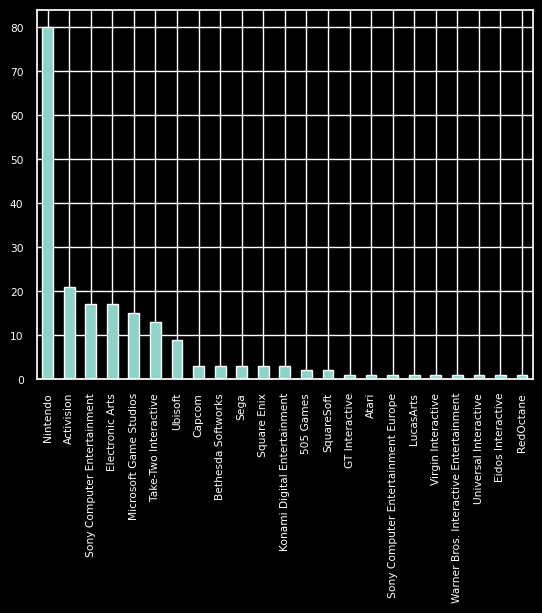

In [65]:
df.Publisher.head(200).value_counts().plot(kind='bar')

In [66]:

# Get the top 20 publishers by game count
top_publishers = df['Publisher'].value_counts().head(20)

# Create a bar chart using Plotly Express
fig = px.bar(top_publishers, x=top_publishers.index, y=top_publishers.values,
             color=top_publishers.values, color_continuous_scale=px.colors.sequential.Viridis,
             labels={'x': 'Publisher', 'y': 'Game Count'},
             title='Top 20 Publishers by Game Count',
             template='plotly_dark')

# Customize the layout and formatting
fig.update_layout(title={'font': {'size': 24, 'color': 'white'}, 'x': 0.5, 'y': 0.95},
                  xaxis={'tickangle': -45, 'tickfont': {'size': 12, 'color': 'white'}},
                  yaxis={'title': None, 'tickfont': {'size': 12, 'color': 'white'}},
                  plot_bgcolor='#222', paper_bgcolor='#222',
                  legend={'bgcolor': '#333', 'bordercolor': '#888', 'borderwidth': 1,
                          'font': {'size': 12, 'color': 'white'}, 'title': {'text': 'Count'}})

# Show the chart
fig.show()

In [55]:
def dubble(x):
    return x*2
print(dubble(5))

duble = lambda x: x*2

print(duble(4))

10
8
